This notebook contains the code used to geenrate Graph statistics, Portfolio metrics plots, mmd plots, lasso and SVM classifications. The Notebook loads graphs generated using Generate_graphs_case_1.py and paper_1_compare_graphs.py.

In [10]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
import seaborn as sns

from matplotlib import cm


# add path to other folders, to import
import sys, os
sys.path.append(os.path.abspath(".."))
from util import plot_avg_degree, plot_G_density, plot_G_signs, fetch_raw_data, avg_degree, color_dark, cnt_pos_neg, plot_weight_signs, color_light

Load raw data

2014-10-01 00:00:00
2022-02-01 00:00:00


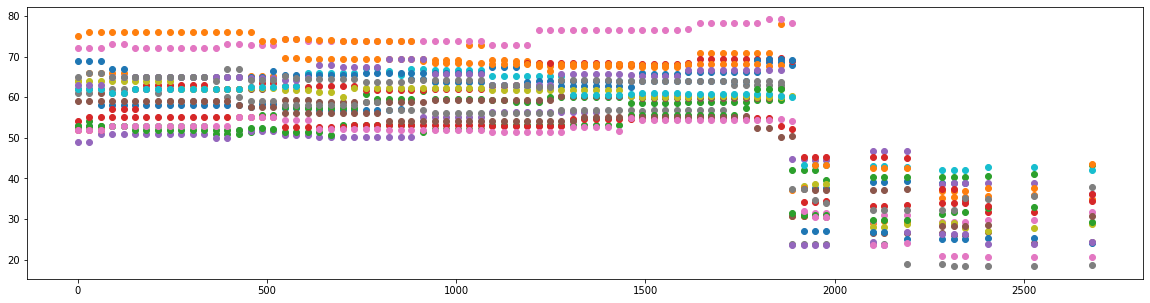

In [11]:
price_df, esg_pivot, sector_classification = fetch_raw_data("C:/Users/User/Code/MMD_Graph_Diversification/")
ind = esg_pivot.loc[:,np.isin(esg_pivot.columns, sector_classification['Energy'])]

fig, ax = plt.subplots(1,1, figsize = (20,5))
for i in range(ind.shape[1]):

    ax.scatter(range(ind.shape[0]),ind.iloc[:,i])

In [12]:
gp_esg_stock = pd.read_pickle('../data/tidy/gp_esg_stock_data_frame.pkl')
gp_esg_stock.index

Index([2014-10-01, 2014-10-02, 2014-10-03, 2014-10-04, 2014-10-05, 2014-10-06,
       2014-10-07, 2014-10-08, 2014-10-09, 2014-10-10,
       ...
       2022-01-23, 2022-01-24, 2022-01-25, 2022-01-26, 2022-01-27, 2022-01-28,
       2022-01-29, 2022-01-30, 2022-01-31, 2022-02-01],
      dtype='object', name='date', length=2681)

# Check Graph statistics and portfolio metrics

Select study: all = global portfolio.

In [15]:
study = 'Industrials'
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)

In [14]:
# Do not need to run this code. Just did this so a memory error would not occur when running paper_1_compare_graphs.py
# # Created low storage dicts use for mmd testing in paper_1_compare_graphs.py
# striped = dict()
# striped['graph_dict'] = scale_F_nonparanormal['graph_dict']
# striped['dates'] = scale_F_nonparanormal['dates']
# striped['return_dict'] = scale_F_nonparanormal['return_dict']
# striped['sector'] = scale_F_nonparanormal['sector']

# path = f'../data/Graphs/Striped_{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(striped, f)

look at how regularization changed over time

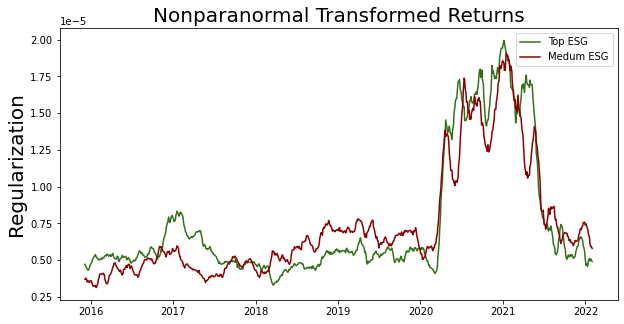

In [16]:

rw = 10
fig, ax = plt.subplots(1,1, figsize = (10,5))

pd.DataFrame(scale_F_nonparanormal['opt_lambda'], index = scale_F_nonparanormal['dates']).iloc[:,[1,2]].rolling(rw).mean().plot(ax = ax, color = color_dark[[0,2]])
ax.set_title('Nonparanormal Transformed Returns',fontdict={'fontsize':20,})
ax.set_ylabel('Regularization',fontdict={'fontsize':20,})
ax.legend(['Top ESG', 'Medum ESG', 'Low ESG'])


plot a sample graph 

0.0004143442616512217
-4.2560084021914595e-05


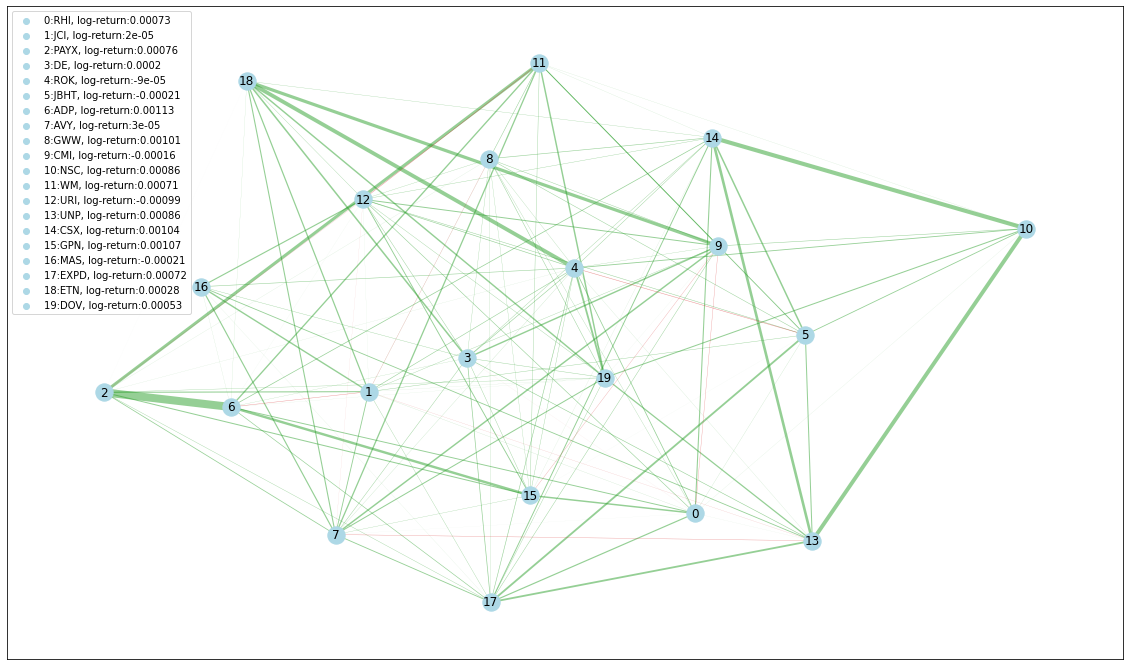

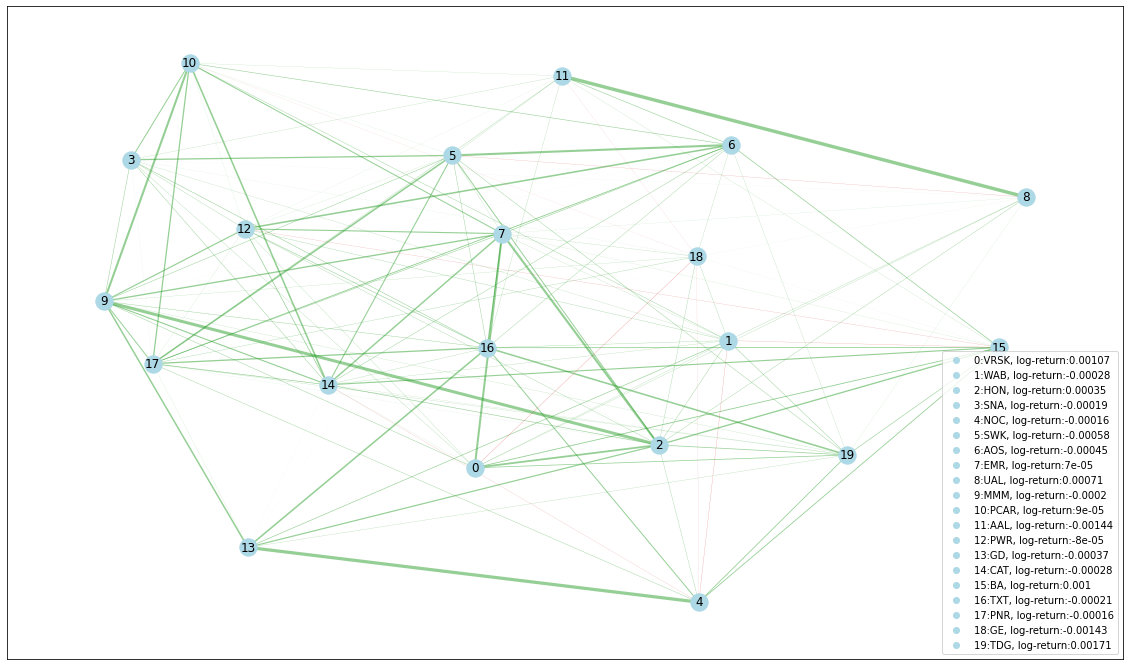

In [18]:
def plot_graph(esg_port, graph_nr):
    """
    esg_port - 0,1,2. 0 is good esg portfolio, 1 is medium esg portfolio, 2 is port esg portfolio
    graph_nr, which graph to plot index from 0 to number of graphs estimated -1
    """

    fig, ax = plt.subplots(1,1, figsize = (20,12))
    G = scale_F_nonparanormal['graph_dict'][esg_port][graph_nr]
    w = scale_F_nonparanormal['portfolios_info']['gmv']['weights'][esg_port][graph_nr]
    pos_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == 1]
    neg_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == -1]

    pos_width = [ w[2]/1000 for w, s in zip(G.edges(data = 'weight'), G.edges(data = 'sign') ) if s[2] == 1]
    neg_width = [ -w[2]/1000 for w, s in zip(G.edges(data = 'weight'), G.edges(data = 'sign') ) if s[2] == -1]

    pos = nx.spring_layout( G, weight=None)

    widths = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx_nodes(G, pos, node_color= 'lightblue',ax = ax)
    nx.draw_networkx_labels(G,pos,{i:i for i in range(len(scale_F_nonparanormal['stock_partition'][esg_port][graph_nr]))},ax = ax)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=pos_edge,
        width=pos_width,
        alpha=0.5,
        edge_color="tab:green",
        ax = ax
    )

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=neg_edge,
        width=neg_width,
        alpha=0.5,
        edge_color="tab:red",
        ax = ax
    )
    # make empty plot with correct color and label for each group
    for cnt, v in enumerate(scale_F_nonparanormal['stock_partition'][esg_port][graph_nr]):
        plt.scatter([],[], label=f'{cnt}:{v}, log-return:{np.round(scale_F_nonparanormal["return_dict"][esg_port][graph_nr][cnt],5)}', color = 'lightblue')

    ax.legend( fontsize = 10)
    print(np.mean(scale_F_nonparanormal["return_dict"][esg_port][graph_nr]))

plot_graph(0, 420)
plot_graph(2, 420)

Plot basic graph statistics

c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()


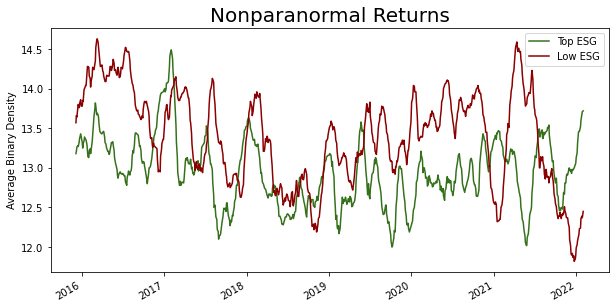

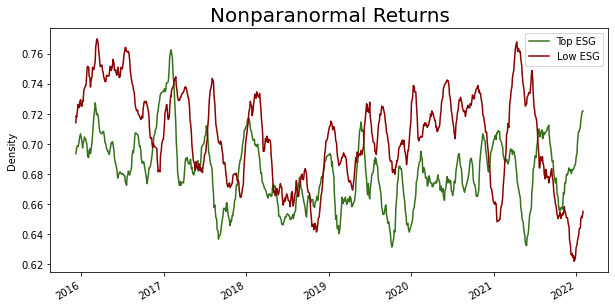

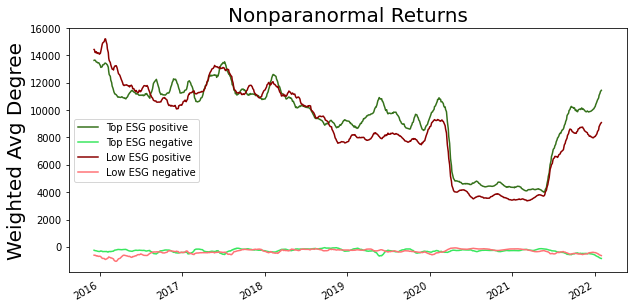

In [20]:
rw = 10
fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_avg_degree(scale_F_nonparanormal, ax = ax, title = f'Nonparanormal Binary Degree', rolling_window= rw, group_iter = [0,2])
ax.set_ylabel('Average Binary Density')
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()



fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_G_density(scale_F_nonparanormal, ax = ax, rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
ax.set_ylabel('Density')
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()



fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_weight_signs(scale_F_nonparanormal, ax = ax, rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
ax.set_ylabel('Weighted Avg Degree',fontdict={'fontsize':20,})
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()


Plot ESG dispersion

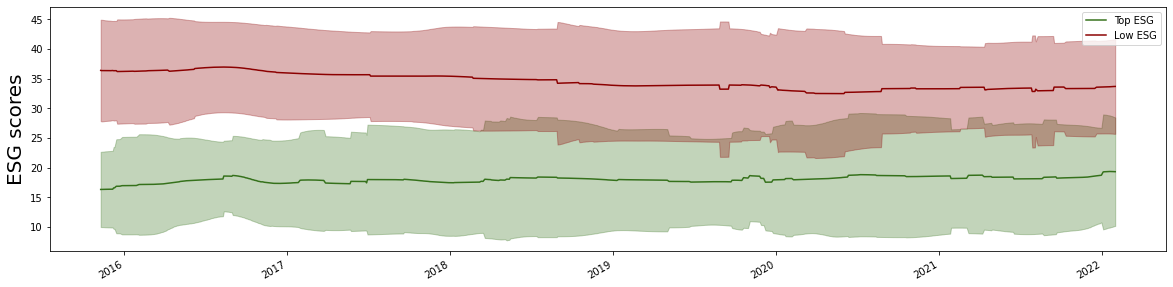

In [21]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][0], color = color_dark[0])
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][0]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    np.array(scale_F_nonparanormal['esg_mean'][0]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    alpha=0.3,
    color = color_dark[0]
)

# ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][1], color = color_dark[1])
# ax.fill_between(
#     scale_F_nonparanormal['dates'].ravel(),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     alpha=0.3,
#     color = color_dark[1]
# )

ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][2]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    np.array(scale_F_nonparanormal['esg_mean'][2]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    alpha=0.3,
    color = color_dark[2]
)

ax.set_ylabel('ESG scores',fontdict={'fontsize':20,})


ax.tick_params( labelsize=10)
ax.legend(['Top ESG', 'Low ESG'])

fig.autofmt_xdate()

Observe if the optimal regularization gives graphs similar to the graphs obtained when using the regularization next to the optimal regularization in the regulariztion grid used.

c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


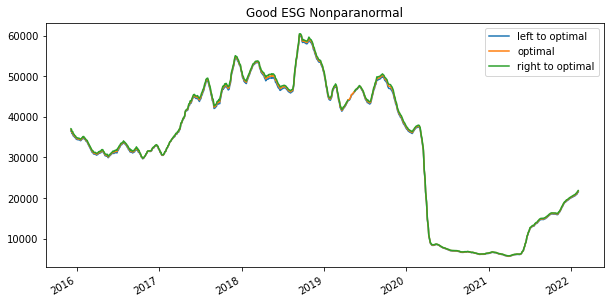

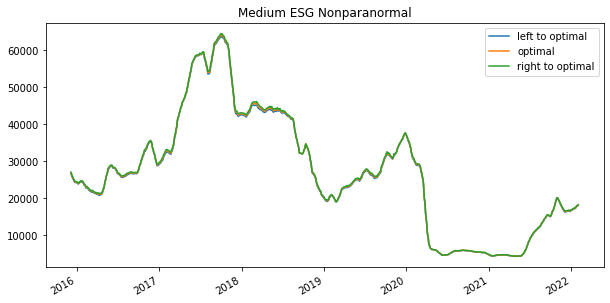

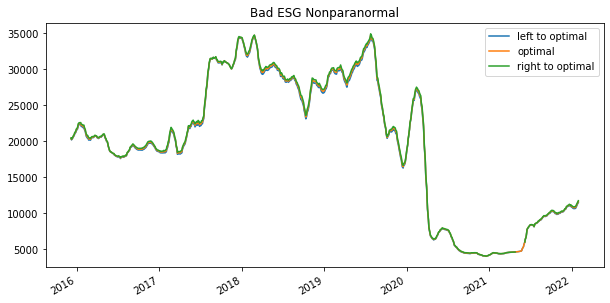

In [67]:
from cmath import isnan


def compare_best_next(df, ax, group, title = '', weight = 'weight'):
    i = group
    # minus one
    Gs_minus_one = []
    for j in range(len(df['prec_dict_minus_1'][i])):
        A = -df['prec_dict_minus_1'][i][j]
        np.fill_diagonal(A,0)
        Gs_minus_one.append(nx.from_numpy_array(A))
    
    Gs_plus_one = []
    for j in range(len(df['prec_dict_plus_1'][i])):
        A = -df['prec_dict_plus_1'][i][j]
        if np.all(np.isnan(A)):
            Gs_plus_one.append(nx.Graph())
        else:
            np.fill_diagonal(A,0)
            Gs_plus_one.append(nx.from_numpy_array(A))

    avg_degree_dict = [avg_degree(G, weight) for G in Gs_minus_one]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'left to optimal')
    # best
    avg_degree_dict = [avg_degree(df['graph_dict'][i][j], weight) for j in range(len(df['prec_dict_minus_1'][i]))]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'optimal')
    # plus one
    avg_degree_dict = [avg_degree(G, weight) for G in Gs_plus_one]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'right to optimal')
    ax.set_title(title)
    ax.legend()

weight = 'weight'
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=0, title = f'Good ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=1, title = f'Medium ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=2, title = f'Bad ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()




Plot efficient frontier (have to change group_nr to get the 0:good, 1:medium, and 2:poor esg portfolios)

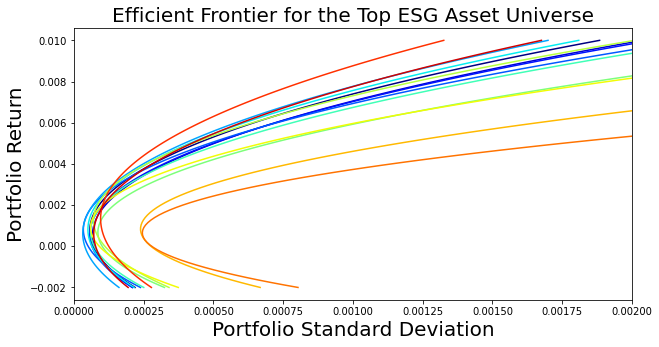

In [22]:
def eff_front(Theta, returns):

    r_hat = np.linspace(-0.002, 0.01,100)
    ones = np.ones(Theta.shape[0])

    A = np.dot(ones, Theta).dot(ones)
    B = np.dot(ones, Theta).dot(returns)
    C = np.dot(returns, Theta).dot(returns)
    denom = A*C-B**2

    sigma = (A*r_hat**2 - 2*B*r_hat + C)/denom

    return r_hat,sigma
    


start = 0.0
stop = 1.0
number_of_lines= 15
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

group_nr = 0
fig, ax = plt.subplots(1,1, figsize = (10,5))
if group_nr == 0:
    ax.set_title('Efficient Frontier for the Top ESG Asset Universe',fontdict={'fontsize':20,})
elif group_nr == 2:
    ax.set_title('Efficient Frontier for the Low ESG Asset Universe',fontdict={'fontsize':20,})
else:
    assert False
for cnt, i in enumerate(range(0,len(scale_F_nonparanormal['graph_dict'][group_nr]),60)):

    r_hat, sigma = eff_front(np.linalg.inv(scale_F_nonparanormal['cov_dict'][group_nr][i]), scale_F_nonparanormal['return_dict'][group_nr][i])


    ax.plot(sigma,r_hat, label = scale_F_nonparanormal['dates'][i], color = colors[cnt])
ax.set_xlabel('Portfolio Standard Deviation',fontdict={'fontsize':20,})
ax.set_ylabel('Portfolio Return',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
ax.set_xlim([0,0.002])

if group_nr == 0:
    pass
elif group_nr == 2:
    ax.legend(bbox_to_anchor = (1,0.9))
else:
    assert False




Plot portfolio metrics for the the good and poor esg portfolios for different portfolio constructions

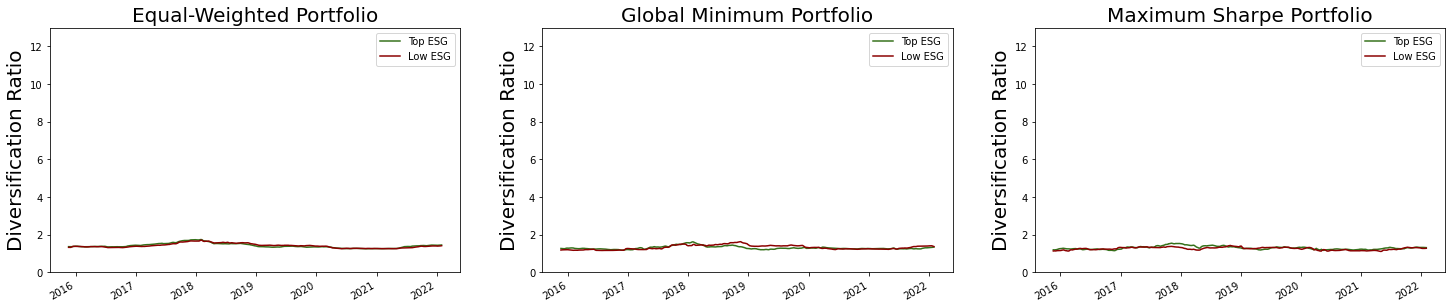

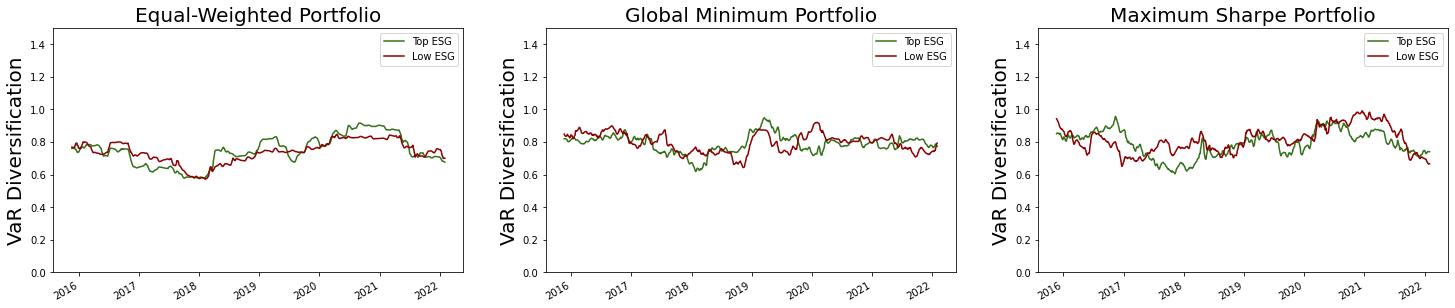

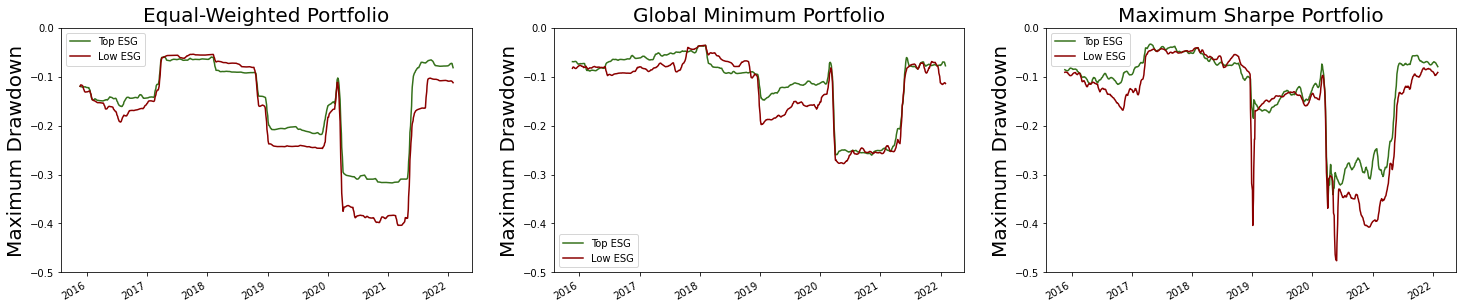

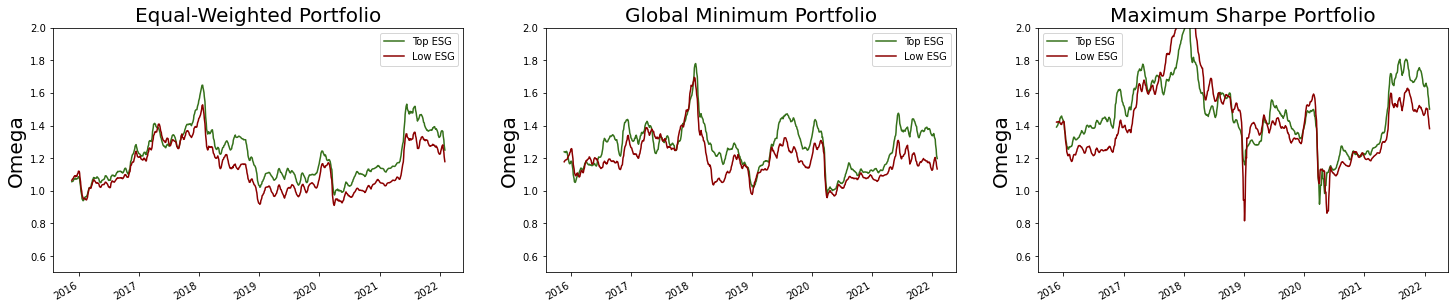

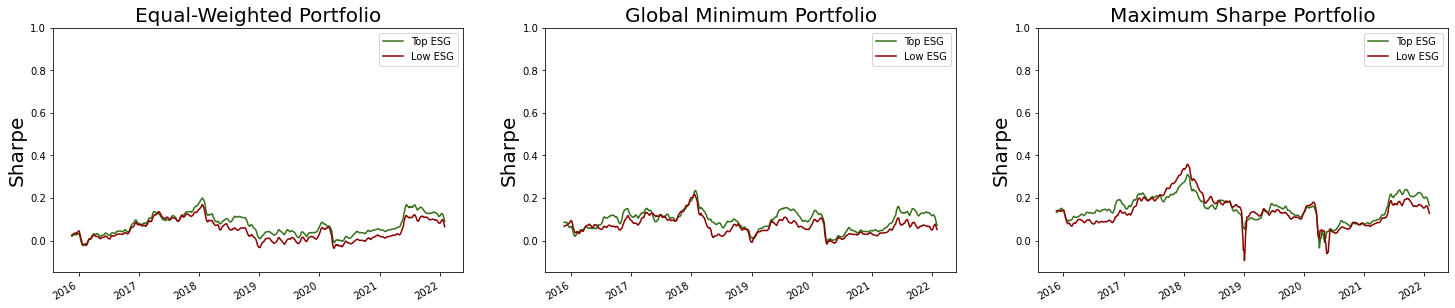

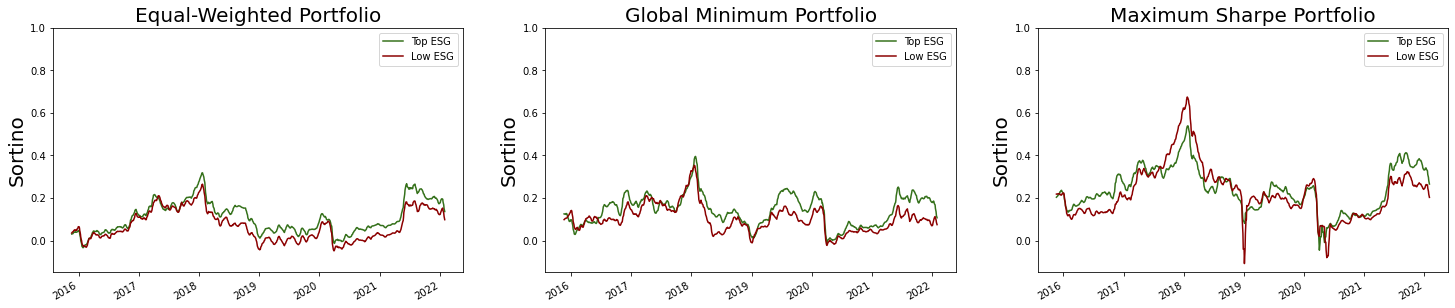

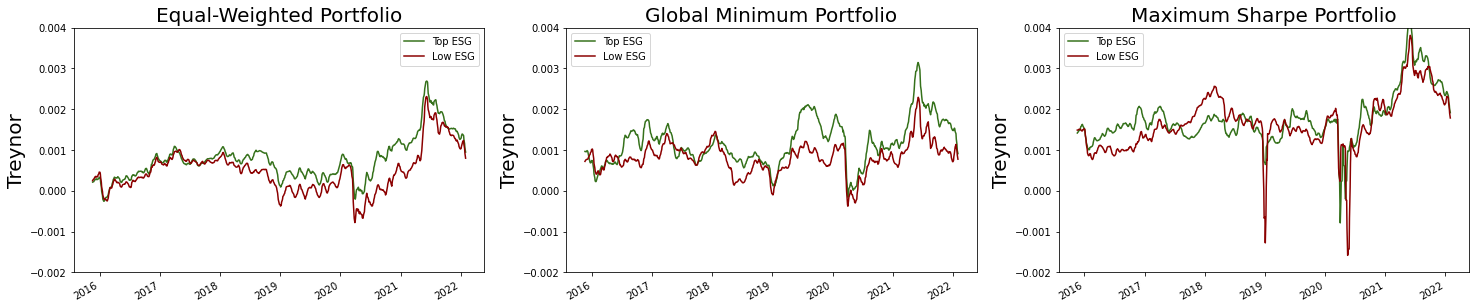

In [23]:
rmean = 5

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[1].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[2].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.0,13]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[1].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[2].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.0,1.5]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[1].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[2].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.5,0]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[1].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[2].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [.5,2]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.15,1]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.15,1]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[1].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[2].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.002,0.004]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


Plot per regularization

In [24]:
def plot_regularization(data_dict, portfolio_type, group, port_metric, ax, title):
    sector = data_dict['sector']
    for regularization in data_dict['portfolios_reg_info'][portfolio_type].keys():
        ddd = data_dict['portfolios_reg_info'][portfolio_type][regularization]
        df = pd.DataFrame(ddd[port_metric][group], index = data_dict['dates']).rolling(5).mean()
        ax.plot(df.index, df.iloc[:,0], label = regularization )
        
    ddd_opt = data_dict['portfolios_info'][portfolio_type]
    df_opt = pd.DataFrame(ddd_opt[port_metric][group], index = data_dict['dates']).rolling(5).mean()
    ax.plot(df.index, df_opt.iloc[:,0], label = 'Optimal', color = 'black', alpha = 0.8)
    ax.set_title(f'{title} {port_metric}')

    ax.legend()

Look at if the assets jump often between esg classes. Should preferably be constant.

Text(0.5, 1.0, 'Portfolio Membership of Assets')

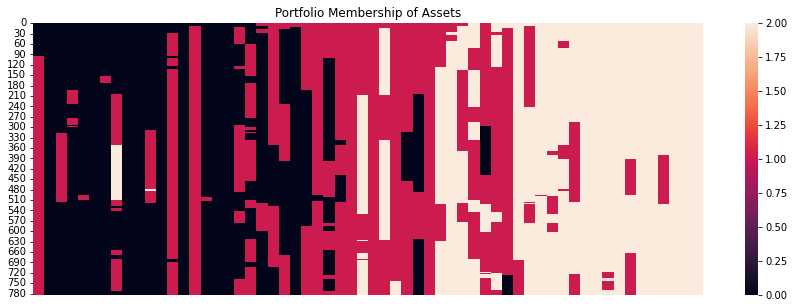

In [25]:
unique_stocks =np.concatenate((scale_F_nonparanormal['stock_partition'][0][0],scale_F_nonparanormal['stock_partition'][1][0],scale_F_nonparanormal['stock_partition'][2][0]))
n = len(scale_F_nonparanormal['stock_partition'][0])
p = len(unique_stocks)
unique_stocks = pd.DataFrame(np.zeros((n,p)), columns= unique_stocks)

for col in unique_stocks.columns:
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            if col in scale_F_nonparanormal['stock_partition'][j][i]:
                unique_stocks[col].iloc[i] = j
                continue

fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.heatmap(unique_stocks, ax = ax, xticklabels=False)

ax.set_title("Portfolio Membership of Assets")

Count number proportion of sector in each class (Will only be informative for the global portfolios)

In [26]:
n = len(scale_F_nonparanormal['stock_partition'][0])
p = 11
sector_count = pd.DataFrame(np.zeros((n*3,12)), columns= np.concatenate((list(sector_classification.keys()), ["group"])))

for k in sector_classification.keys():
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            cnt = np.sum(np.isin(scale_F_nonparanormal['stock_partition'][j][i], sector_classification[k]))
            sector_count[k].iloc[(i*3)+j] = cnt
            sector_count['group'].iloc[(i*3)+j] = j


Text(0.5, 1.0, 'Low ESG Asset World')

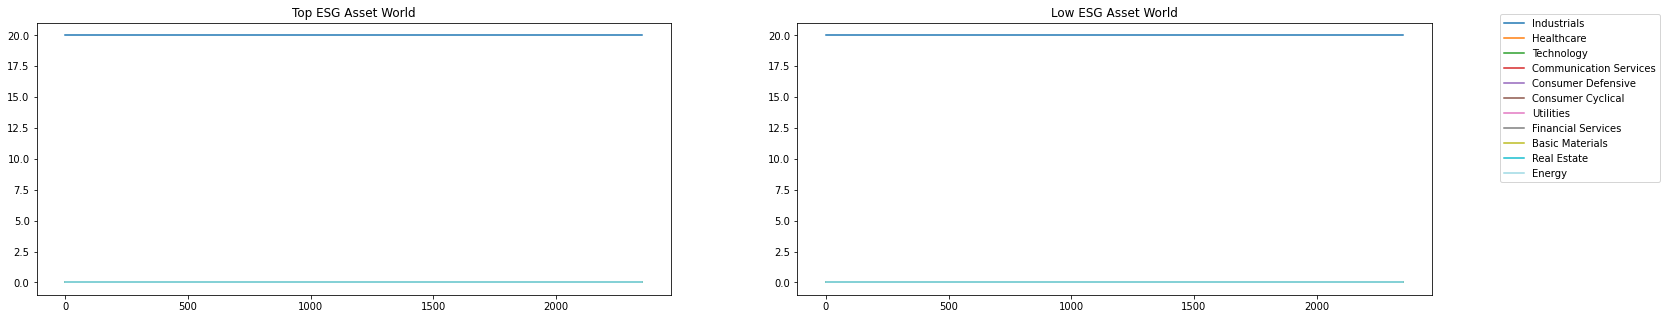

In [27]:

start = 0.0
stop = 1.0
number_of_lines= 11
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig, ax = plt.subplots(1,2, figsize = (25,5))
for cnt,j in enumerate([0,2]):
    # [['Utilities', 'Energy', 'Basic Materials']]
    sector_count.loc[sector_count['group'] == j, ~np.isin(sector_count.columns, ["group"])].plot(ax = ax[cnt], title = f'Group {j}', color = colors,legend=False)

ax[1].legend(bbox_to_anchor=(1.1, 1.05))
ax[0].set_title("Top ESG Asset World")
ax[1].set_title("Low ESG Asset World")



# Look at mmd

Look if there is a relationship between size of portfolio and esg score, I manually created this data by loading it individally. 

In [32]:
with open("../data/esg_portfolio_diff.pkl", "rb") as f:
    esg_portfolio_diff = pickle.load(f)
with open("../data/monk_data.pkl", "rb") as f:
    monk_data = pickle.load(f)
monk_data = monk_data.rename(columns = {'all':'Global'})


In [33]:
window = 70

agg_monk_rej = pd.DataFrame()
agg_esg_diff = pd.DataFrame()
for i in range(window,monk_data.shape[0], window ):
    tmp_rej = dict()
    tmp_diff = dict()
    for j in esg_portfolio_diff.columns:
        if j == 'dates':
            continue
        tmp_rej[j] = np.mean(monk_data[j ].iloc[(i-window):i] <= 0.01)
        tmp_diff[j] = np.mean(esg_portfolio_diff[j ].iloc[(i-window):i])
    
    tmp_rej['dates'] = monk_data['dates'].iloc[i]
    tmp_diff['dates'] = monk_data['dates'].iloc[i]


    agg_monk_rej = pd.concat((agg_monk_rej, pd.DataFrame(tmp_rej, index = [0])), ignore_index=True)
    agg_esg_diff = pd.concat((agg_esg_diff, pd.DataFrame(tmp_diff, index = [0])), ignore_index=True)




Text(0.5, 0, 'Difference between ESG scores')

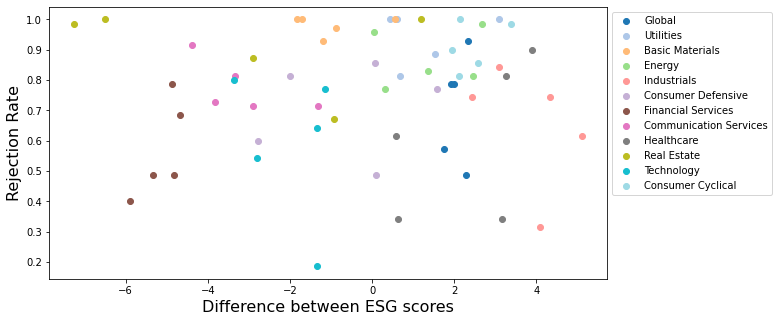

In [34]:
from matplotlib import cm
start = 0.0
stop = 1.0
number_of_lines= 12
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig, ax = plt.subplots(1,1, figsize = (10,5))
for i, j in enumerate(agg_monk_rej.columns):
    if j == 'dates':
        continue
    ax.scatter(agg_esg_diff[j], agg_monk_rej[j], label = j, color = colors[i])
ax.legend()
ax.legend(bbox_to_anchor = (1,1))
ax.set_ylabel("Rejection Rate", fontdict={'fontsize':16})
ax.set_xlabel("Difference between ESG scores", fontdict={'fontsize':16})

Text(0.5, 0, 'Date')

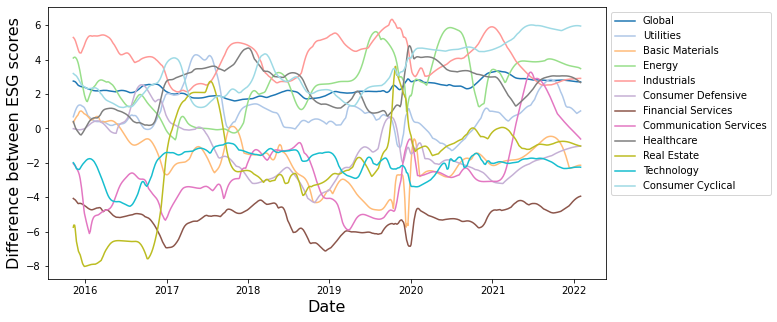

In [35]:

from matplotlib import cm
start = 0.0
stop = 1.0
number_of_lines= 12
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig,ax = plt.subplots(1,1, figsize = (10,5))
for i, k in enumerate(esg_portfolio_diff.columns):
    ax.plot(esg_portfolio_diff.index, esg_portfolio_diff[k], color = colors[i], label = k)
ax.legend(bbox_to_anchor = (1,1))
ax.set_ylabel("Difference between ESG scores", fontdict={'fontsize':16})
ax.set_xlabel("Date", fontdict={'fontsize':16})

Now load mmd. Note that we load the portfolios again as well

In [4]:

study = 'Industrials'
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)

# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_wloa_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_prop_p_return_tensor_False_w_0.0001_t_max_6
# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_sp_p_uniform_tensor_False_round_node_1_round_edge_2
# n_20_B_5000_dstep_2_glabel_pyramid_p_return_tensor_False_L_8_d_6_with_labels_False
with open(f'../data/mmd_test/{study}/n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info.keys()


print(np.sum(test_info['info_dict']['MONK_EST'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_u'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_l'] <0.01)/test_info['info_dict'].shape[0])


In [6]:
# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_wloa_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_prop_p_return_tensor_False_w_0.0001_t_max_6
# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_sp_p_uniform_tensor_False_round_node_1_round_edge_2
# n_20_B_5000_dstep_2_glabel_pyramid_p_return_tensor_False_L_8_d_6_with_labels_False
with open(f'../data/mmd_test/{study}/n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info.keys()


print(np.sum(test_info['info_dict']['MONK_EST'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_u'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_l'] <0.01)/test_info['info_dict'].shape[0])


0.5706806282722513
0.8036649214659686
0.8821989528795812


 Plot mmd and compare with diversification

Text(0, 0.5, 'p-value')

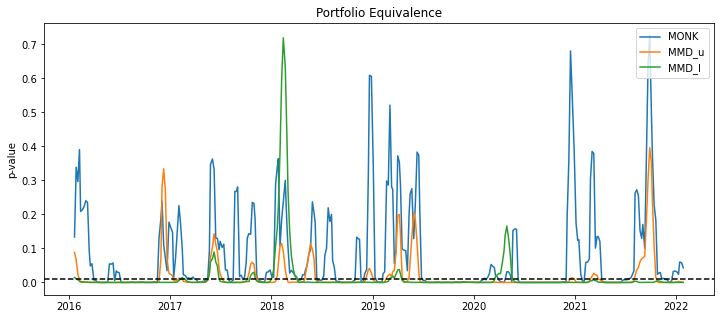

In [9]:
tmp = test_info['info_dict']
sector = test_info['sector']
fig ,ax = plt.subplots(1,1, figsize = (12,5))

tmp['id'] = tmp['group_i'].astype(str) + tmp['group_j'].astype(str) 
for id in ["02"]:#np.unique(tmp['id']):
    tmp_tmp = tmp.loc[tmp['id'] == id]

    ax.plot(tmp_tmp['dates'], tmp_tmp['MONK_EST'].rolling(3).mean(), label = 'MONK')
    ax.plot(tmp_tmp['dates'], tmp_tmp['MMD_u'].rolling(3).mean(), label = 'MMD_u')
    ax.plot(tmp_tmp['dates'], tmp_tmp['MMD_l'].rolling(3).mean(), label = 'MMD_l')
ax.axhline(y = 0.01, color = 'black', linestyle = '--')
ax.legend(loc = 'upper right')
ax.set_title('Portfolio Equivalence')
ax.set_ylabel('p-value')


Analyze the performance

In [2540]:
ptypes = list(scale_F_nonparanormal['portfolios_info'].keys())
metrics = list(scale_F_nonparanormal['portfolios_info']['gmv'].keys())
higher_better = ['omega', 'sharpe', 'sortino', 'treynor', 'max_draw', 'cov_div']

info_dataframe = pd.DataFrame()
cluster_dataframe = pd.DataFrame()


for i in range(test_info['info_dict'].shape[0]):
    date_i = test_info['info_dict']['dates'].iloc[i]
    idx = np.where(scale_F_nonparanormal['dates'] == date_i)[0][0]  # index for each metric
    n = 20
    info = dict()
    cluster_info = dict()
    for ptype in ptypes:
        for metric in metrics:
            if metric == 'weights' or metric == 'beta':
                continue

            current_metric_analyzed_good = np.array(scale_F_nonparanormal['portfolios_info'][ptype][metric][0])
            current_metric_analyzed_poor = np.array(scale_F_nonparanormal['portfolios_info'][ptype][metric][2])

            info['ptype'] = ptype
            info['metric'] = metric
            if metric == 'var_div':
                info['ratio_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] < current_metric_analyzed_poor[(idx-n):idx])/float(n)
                info['nr_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] < current_metric_analyzed_poor[(idx-n):idx])
            else:
                info['ratio_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] > current_metric_analyzed_poor[(idx-n):idx])/float(n)
                info['nr_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] > current_metric_analyzed_poor[(idx-n):idx])

            info['MONK'] = test_info['info_dict']['MONK_EST'].iloc[i] <0.01
            info['MMD_u'] = test_info['info_dict']['MMD_u'].iloc[i] <0.01
            info['MMD_l'] = test_info['info_dict']['MMD_l'].iloc[i] <0.01
            info['date'] = date_i

            info = pd.DataFrame(info, index = [0])
            info_dataframe = pd.concat((info_dataframe, info), ignore_index= True)

            cluster_info[str(ptype) + str(metric)] = np.mean(current_metric_analyzed_good[(idx-n):idx]-current_metric_analyzed_poor[(idx-n):idx])

    cluster_info['label_monk'] = int(test_info['info_dict']['MONK_EST'].iloc[i] <0.01)
    cluster_info['label_mmd_u'] = int(test_info['info_dict']['MMD_u'].iloc[i] <0.01)
    cluster_info['label_mmd_l'] = int(test_info['info_dict']['MMD_l'].iloc[i] <0.01)
    cluster_info['date'] = date_i
    cluster_info = pd.DataFrame(cluster_info, index = [0])
    cluster_dataframe = pd.concat((cluster_dataframe, cluster_info), ignore_index= True)




In [2541]:
info_dataframe['DivMetric'] = False
info_dataframe['DivMetric'].loc[np.isin(info_dataframe['metric'], ['cov_div', 'var_div']) ] = True
info_dataframe['nr_bad_esg_better'] = 20-info_dataframe['nr_good_esg_better']

C:\Users\User\AppData\Local\Temp\ipykernel_9112\111386262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_dataframe['DivMetric'].loc[np.isin(info_dataframe['metric'], ['cov_div', 'var_div']) ] = True


In [2542]:
info_dataframe

,ptype,metric,ratio_good_esg_better,nr_good_esg_better,MONK,MMD_u,MMD_l,date,DivMetric,nr_bad_esg_better
0,uniform,cov_div,0.00,0,True,True,True,2016-01-08,True,20
1,uniform,var_div,0.00,0,True,True,True,2016-01-08,True,20
2,uniform,omega,1.00,20,True,True,True,2016-01-08,False,0
3,uniform,sharpe,1.00,20,True,True,True,2016-01-08,False,0
4,uniform,sortino,1.00,20,True,True,True,2016-01-08,False,0
...,...,...,...,...,...,...,...,...,...,...
8017,gmv,omega,0.45,9,True,True,True,2022-01-27,False,11
8018,gmv,sharpe,0.45,9,True,True,True,2022-01-27,False,11
8019,gmv,sortino,0.55,11,True,True,True,2022-01-27,False,9
8020,gmv,treynor,0.85,17,True,True,True,2022-01-27,False,3


In [2543]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_esg_better = info_dataframe[[ 'nr_good_esg_better']].agg(['sum'])
nr_esg_better['ratio_nr_good_esg_better'] = nr_esg_better['nr_good_esg_better']/(20*nr_date*nr_metric*nr_ptype)
nr_esg_better.reset_index(inplace=True)
nr_esg_better

,index,nr_good_esg_better,ratio_nr_good_esg_better
0,sum,72518,0.451995


In [2544]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected = info_dataframe[[ 'MONK','nr_good_esg_better', 'nr_bad_esg_better']].groupby(['MONK']).agg(['sum', 'count'])
nr_rejected.reset_index(inplace=True)
nr_rejected['ratio_nr_good_esg_better'] = nr_rejected[('nr_good_esg_better', 'sum')]/nr_rejected[('nr_good_esg_better', 'count')]/20
nr_rejected['ratio_nr_bad_esg_better'] = nr_rejected[('nr_bad_esg_better', 'sum')]/nr_rejected[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected

MONK nr_good_esg_better       nr_bad_esg_better        \
                        sum count               sum count   
0  False               5596   441              3224   441   
1   True              66922  7581             84698  7581   

  ratio_nr_good_esg_better ratio_nr_bad_esg_better  
                                                    
0                 0.634467                0.365533  
1                 0.441380                0.558620

In [2545]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype = info_dataframe[['ptype','MONK','nr_good_esg_better']].groupby(['ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype.reset_index(inplace=True)
nr_rejected_per_ptype['ratio_nr_good_esg_better'] = nr_rejected_per_ptype[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype

ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                 sum count                         
0      gmv  False               1663   147                 0.565646
1      gmv   True              25426  2527                 0.503087
2   sharpe  False               2035   147                 0.692177
3   sharpe   True              18234  2527                 0.360784
4  uniform  False               1898   147                 0.645578
5  uniform   True              23262  2527                 0.460269

In [2546]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype_divmetric = info_dataframe[['DivMetric','ptype','MONK','nr_good_esg_better']].groupby(['DivMetric','ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype_divmetric.reset_index(inplace=True)
nr_rejected_per_ptype_divmetric['ratio_nr_good_esg_better'] = nr_rejected_per_ptype_divmetric[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype_divmetric[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype_divmetric.sort_values(['ptype'])

DivMetric    ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                            sum count                         
0      False      gmv  False               1481   105                 0.705238
1      False      gmv   True              21355  1805                 0.591551
6       True      gmv  False                182    42                 0.216667
7       True      gmv   True               4071   722                 0.281925
2      False   sharpe  False               1621   105                 0.771905
3      False   sharpe   True              14138  1805                 0.391634
8       True   sharpe  False                414    42                 0.492857
9       True   sharpe   True               4096   722                 0.283657
4      False  uniform  False               1720   105                 0.819048
5      False  uniform   True              23170  1805                 0.641828
10      True  uniform  False                178    42                 0.211905
11      True  uniform   True                 92   722                 0.006371

In [2547]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype_metric = info_dataframe[['metric','ptype','MONK','nr_good_esg_better']].groupby(['metric','ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype_metric.reset_index(inplace=True)
nr_rejected_per_ptype_metric['ratio_nr_good_esg_better'] = nr_rejected_per_ptype_metric[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype_metric[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype_metric
nr_rejected_per_ptype_metric.sort_values(['metric','ptype'])

metric    ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                            sum count                         
0    cov_div      gmv  False                  9    21                 0.021429
1    cov_div      gmv   True               1881   361                 0.260526
2    cov_div   sharpe  False                208    21                 0.495238
3    cov_div   sharpe   True               2294   361                 0.317729
4    cov_div  uniform  False                 64    21                 0.152381
5    cov_div  uniform   True                  6   361                 0.000831
6   max_draw      gmv  False                263    21                 0.626190
7   max_draw      gmv   True               3987   361                 0.552216
8   max_draw   sharpe  False                344    21                 0.819048
9   max_draw   sharpe   True               3416   361                 0.473130
10  max_draw  uniform  False                362    21                 0.861905
11  max_draw  uniform   True               5318   361                 0.736565
12     omega      gmv  False                296    21                 0.704762
13     omega      gmv   True               4160   361                 0.576177
14     omega   sharpe  False                318    21                 0.757143
15     omega   sharpe   True               2466   361                 0.341551
16     omega  uniform  False                323    21                 0.769048
17     omega  uniform   True               4167   361                 0.577147
18    sharpe      gmv  False                296    21                 0.704762
19    sharpe      gmv   True               4230   361                 0.585873
20    sharpe   sharpe  False                317    21                 0.754762
21    sharpe   sharpe   True               2583   361                 0.357756
22    sharpe  uniform  False                337    21                 0.802381
23    sharpe  uniform   True               4273   361                 0.591828
24   sortino      gmv  False                296    21                 0.704762
25   sortino      gmv   True               4223   361                 0.584903
26   sortino   sharpe  False                317    21                 0.754762
27   sortino   sharpe   True               2477   361                 0.343075
28   sortino  uniform  False                341    21                 0.811905
29   sortino  uniform   True               4329   361                 0.599584
30   treynor      gmv  False                330    21                 0.785714
31   treynor      gmv   True               4755   361                 0.658587
32   treynor   sharpe  False                325    21                 0.773810
33   treynor   sharpe   True               3196   361                 0.442659
34   treynor  uniform  False                357    21                 0.850000
35   treynor  uniform   True               5083   361                 0.704017
36   var_div      gmv  False                173    21                 0.411905
37   var_div      gmv   True               2190   361                 0.303324
38   var_div   sharpe  False                206    21                 0.490476
39   var_div   sharpe   True               1802   361                 0.249584
40   var_div  uniform  False                114    21                 0.271429
41   var_div  uniform   True                 86   361                 0.011911

Text(0.5, 1.0, 'sharpe')

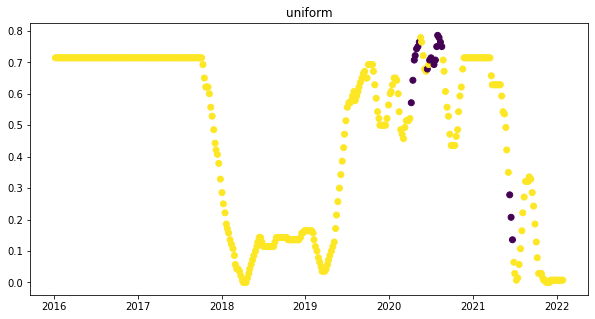

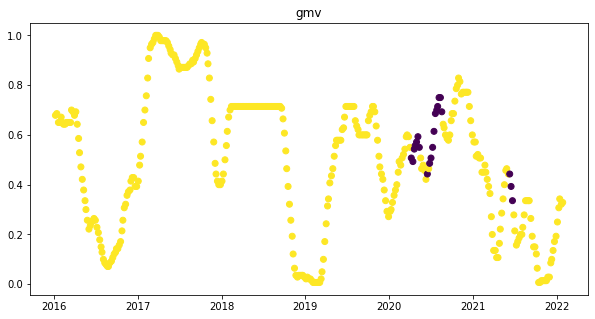

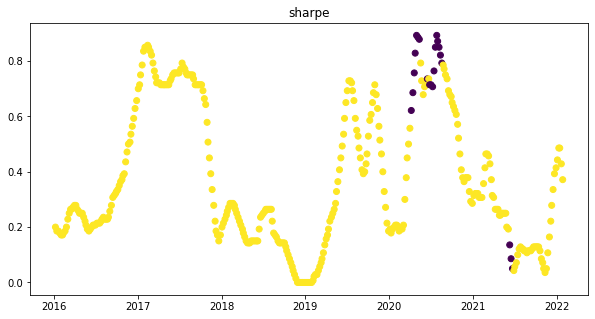

In [2548]:
nr_rejected = info_dataframe[['ptype', 'MONK', 'date','nr_good_esg_better']].groupby(['date', 'ptype','MONK']).agg(['sum'])
nr_rejected['ratio_nr_good_esg_better'] = nr_rejected['nr_good_esg_better']/(20*len(np.unique(info_dataframe['metric'])))
nr_rejected.reset_index(inplace=True)
fig, ax = plt.subplots(1,1, figsize = (10,5))
tmp = nr_rejected.loc[(nr_rejected['ptype'] == 'uniform')]
ax.scatter(tmp['date'],tmp['ratio_nr_good_esg_better'], c = tmp['MONK'])
ax.set_title(f'uniform')

fig, ax = plt.subplots(1,1, figsize = (10,5))
tmp = nr_rejected.loc[(nr_rejected['ptype'] == 'gmv')]
ax.scatter(tmp['date'],tmp['ratio_nr_good_esg_better'], c = tmp['MONK'])
ax.set_title(f'gmv')

fig, ax = plt.subplots(1,1, figsize = (10,5))
tmp = nr_rejected.loc[(nr_rejected['ptype'] == 'sharpe')]
ax.scatter(tmp['date'],tmp['ratio_nr_good_esg_better'], c = tmp['MONK'])
ax.set_title(f'sharpe')

C:\Users\User\AppData\Local\Temp\ipykernel_9112\2224656717.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize = (10,5))


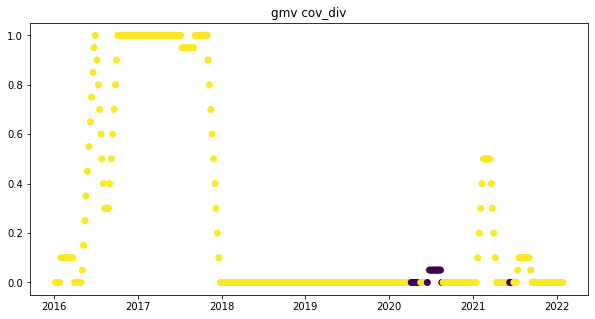

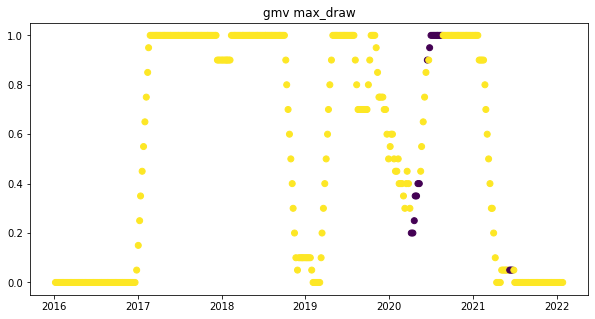

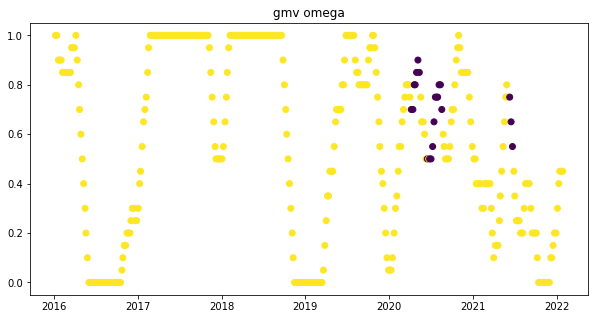

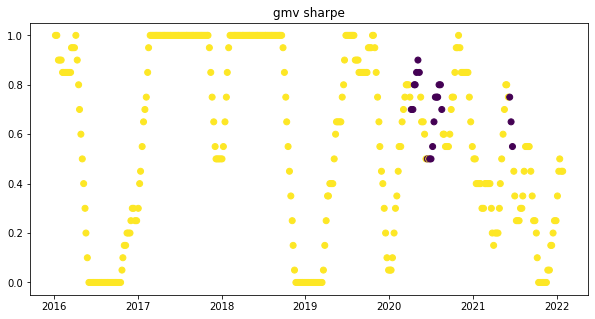

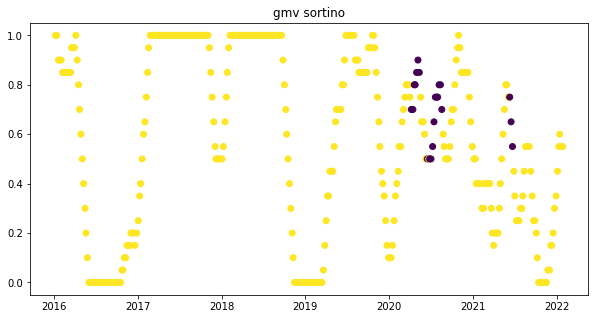

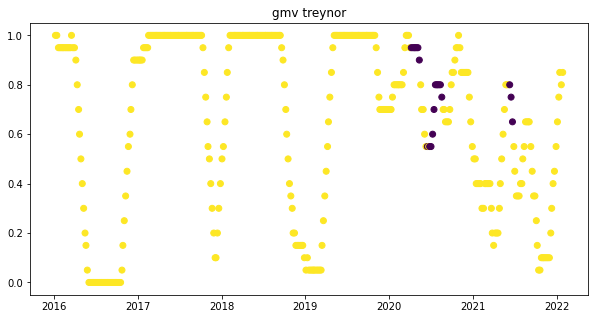

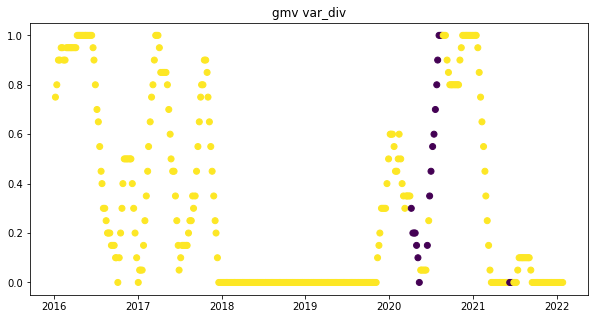

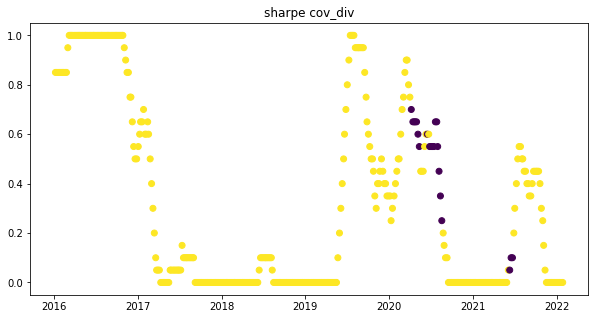

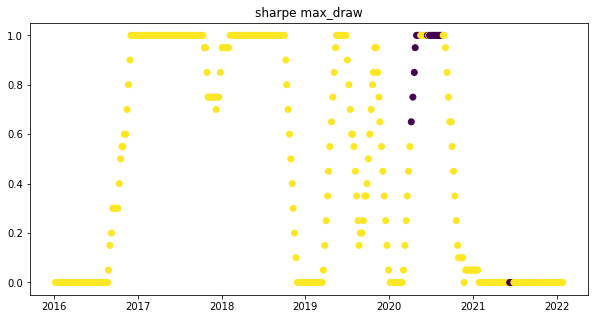

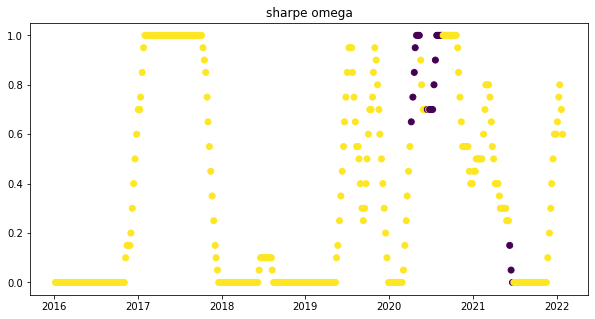

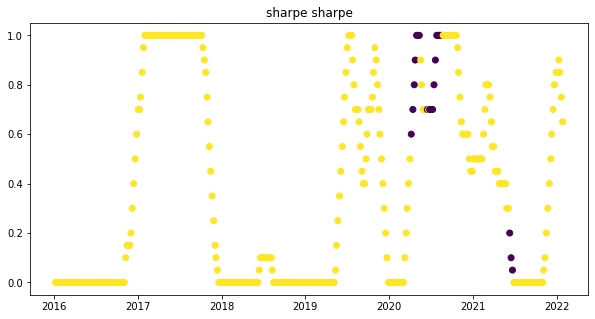

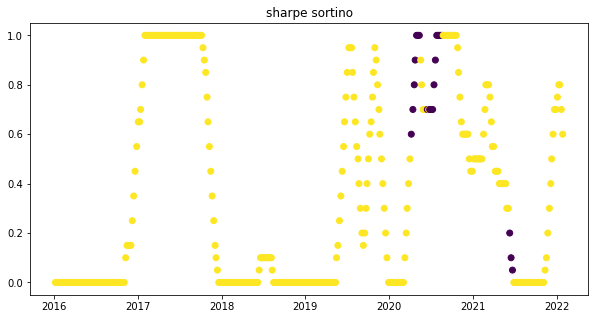

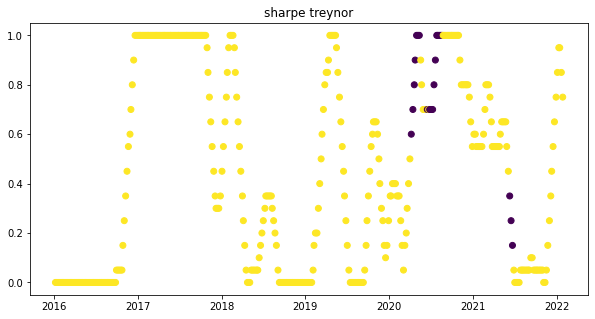

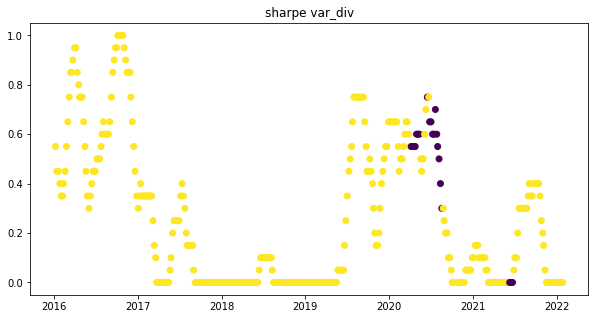

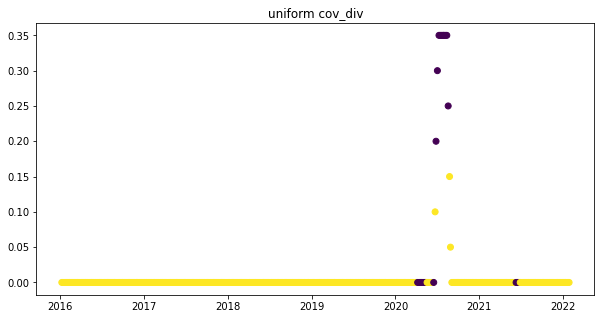

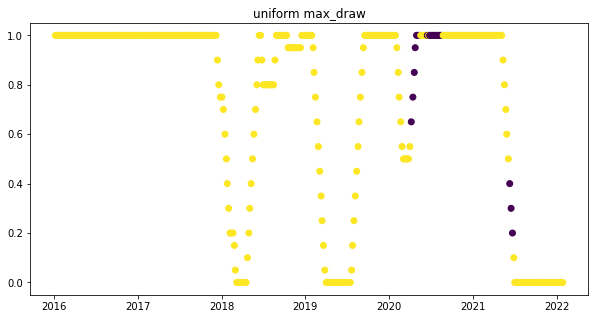

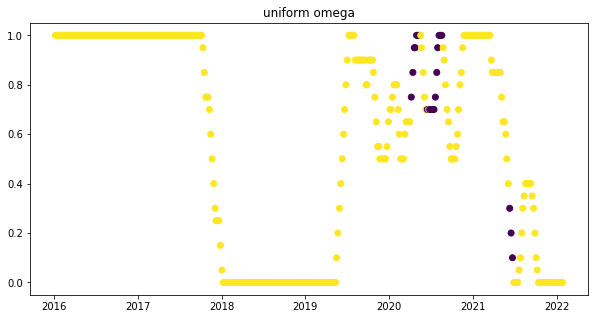

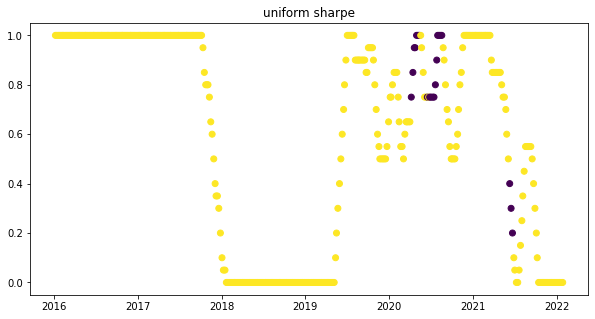

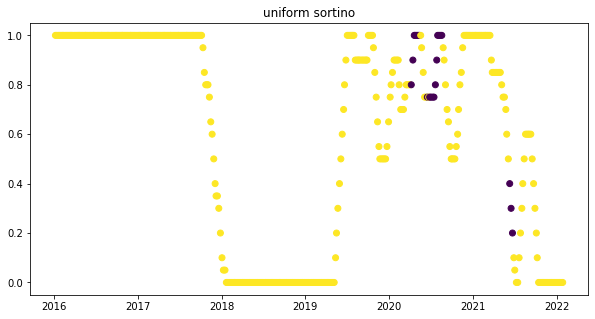

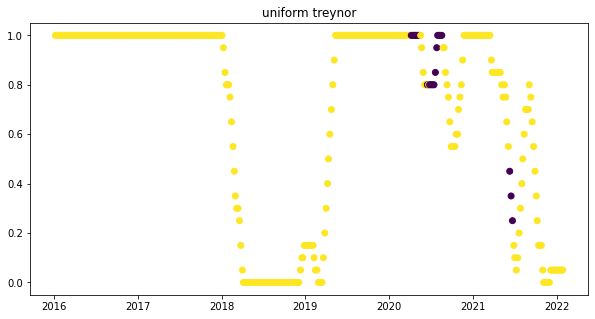

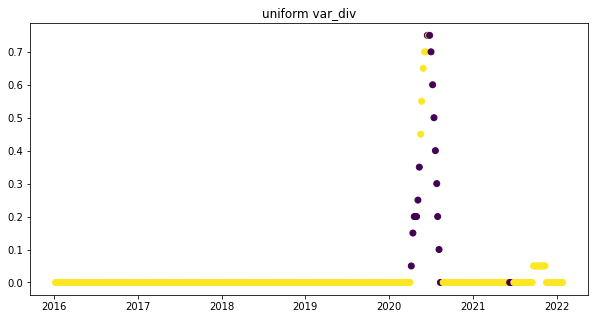

In [2549]:
for ptype in np.unique(info_dataframe['ptype']):
    for metric in np.unique(info_dataframe['metric']):
        fig, ax = plt.subplots(1,1, figsize = (10,5))
        tmp = info_dataframe.loc[(info_dataframe['ptype'] == ptype) & (info_dataframe['metric'] == metric)].copy()
        ax.scatter(tmp['date'],tmp['ratio_good_esg_better'], c = tmp['MONK'])
        ax.set_title(f'{ptype} {metric}')

PCA analysis

In [2550]:

uniform_cols = ['uniformcov_div', 'uniformvar_div', 'uniformomega', 'uniformsharpe',
       'uniformsortino', 'uniformtreynor', 'uniformmax_draw']
sharpe_cols = ['sharpecov_div', 'sharpevar_div', 'sharpeomega', 'sharpesharpe',
       'sharpesortino', 'sharpetreynor', 'sharpemax_draw']
gmv_cols = ['gmvcov_div', 'gmvvar_div', 'gmvomega', 'gmvsharpe', 'gmvsortino', 'gmvtreynor', 'gmvmax_draw']

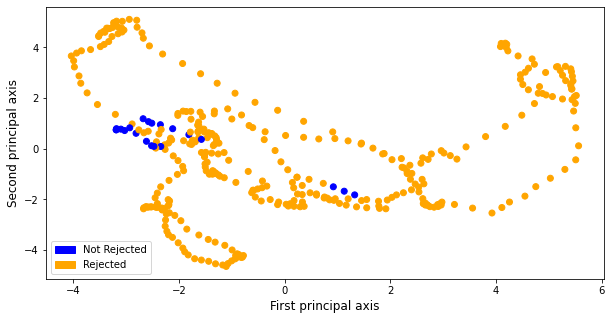

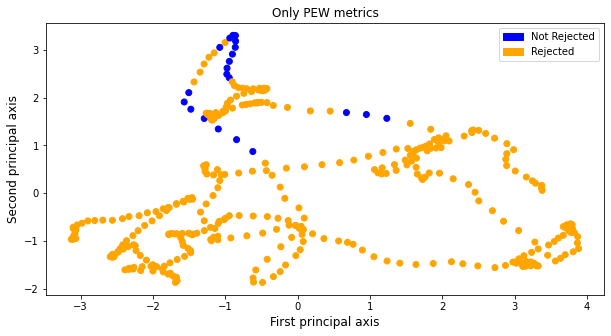

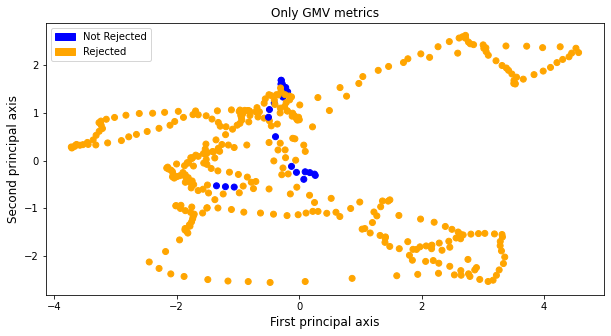

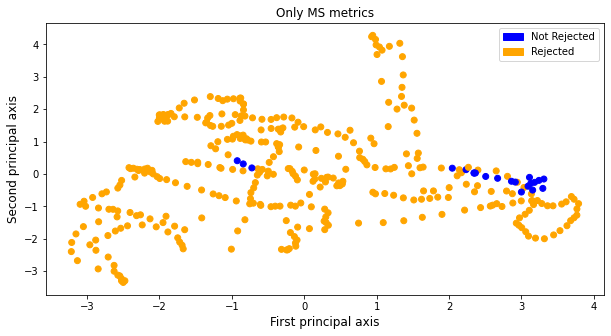

In [2551]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colors_monk = np.array(['lightgreen'] * cluster_dataframe.shape[0])
colors_monk[cluster_dataframe['label_monk'] == 0] = 'lightred'

y = np.zeros(len(cluster_dataframe['label_monk'] ))
y[cluster_dataframe['label_monk'] == 1] = 1


X = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, uniform_cols+sharpe_cols+gmv_cols)] 
X_uniform  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, uniform_cols)] 
X_sharpe  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, sharpe_cols)]  
X_gmv  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, gmv_cols)]  

n_components = 5

def plot_pca(components, title = ""):
    colors = np.array(['orange'] * len(cluster_dataframe['label_monk']))
    colors[cluster_dataframe['label_monk'] == 0] = 'blue'

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.scatter(components[:,0], components[:,1], c=colors)
    ax.set_xlabel('First principal axis', fontdict={'fontsize':12})
    ax.set_ylabel('Second principal axis', fontdict={'fontsize':12})

    pop_a = mpatches.Patch(color='blue', label='Not Rejected')
    pop_b = mpatches.Patch(color='orange', label='Rejected')
    ax.legend(handles=[pop_a,pop_b])
    ax.set_title(title)


pca = PCA(n_components=n_components)
components = pca.fit_transform(scaler.fit_transform(X))
plot_pca(components)

pca_uniform = PCA(n_components=n_components)
components_uniform = pca_uniform.fit_transform(scaler.fit_transform(X_uniform))
plot_pca(components_uniform, 'Only PEW metrics')

pca_gmv = PCA(n_components=n_components)
components_gmv = pca_gmv.fit_transform(scaler.fit_transform(X_gmv))
plot_pca(components_gmv, 'Only GMV metrics')

pca_sharpe = PCA(n_components=n_components)
components_sharpe = pca_sharpe.fit_transform(scaler.fit_transform(X_sharpe))
plot_pca(components_sharpe, 'Only MS metrics')




In [2552]:
pca.explained_variance_ratio_

array([0.35408421, 0.28672119, 0.12468841, 0.10396603, 0.04676373])

c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(m

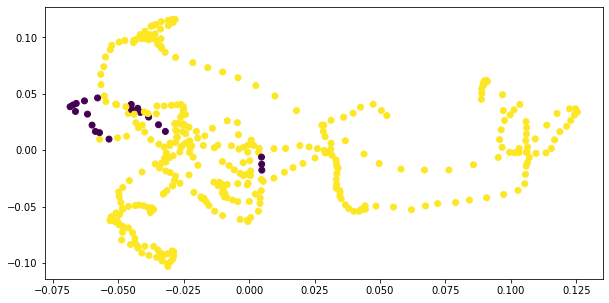

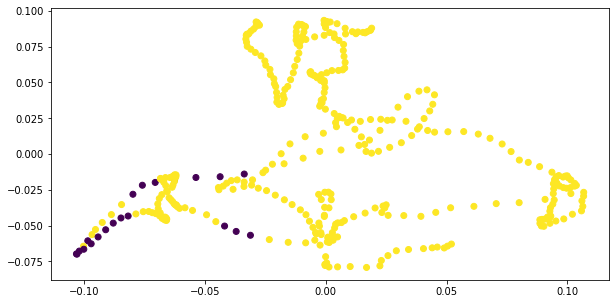

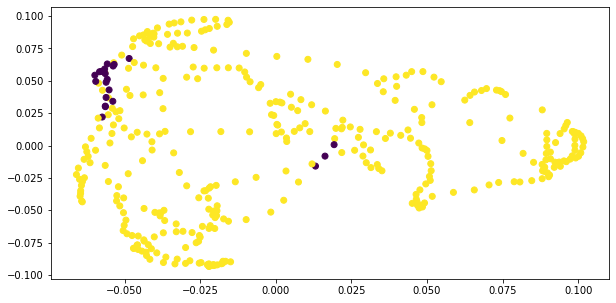

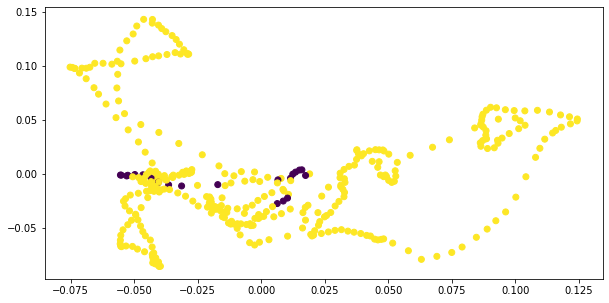

In [2553]:
n_components = 3

transformer = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 0.1)
X_kpca = transformer.fit_transform(X)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer.alphas_[:,0], transformer.alphas_[:,1], c=cluster_dataframe['label_monk'])

# Uniform
transformer_uniform = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = .1)
X_kpca = transformer_uniform.fit_transform(X_uniform)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_uniform.alphas_[:,0], transformer_uniform.alphas_[:,1], c=cluster_dataframe['label_monk'])

# Sharpe
transformer_sharpe = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 10)
X_kpca = transformer_sharpe.fit_transform(X_sharpe)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_sharpe.alphas_[:,0], transformer_sharpe.alphas_[:,1], c=cluster_dataframe['label_monk'])

# GMV
transformer_gmv = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 0.8)
X_kpca = transformer_gmv.fit_transform(X_gmv)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_gmv.alphas_[:,0], transformer_gmv.alphas_[:,1], c=cluster_dataframe['label_monk'])

PCA classification

In [2554]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
index = np.random.permutation(X_scaled.shape[0])
components_perm = components[index]
y_perm = y[index]

Cs = np.linspace(0.01, 5, 100)
cvs_lasso = []
cvs_lasso_std = []
for c in [0]:
    clf_lasso = LogisticRegression(penalty='l2', solver='liblinear', class_weight = 'balanced')
    scores = cross_val_score(clf_lasso, components_perm, y_perm, cv=3, scoring="roc_auc")
    cvs_lasso.append(np.mean(scores))
    cvs_lasso_std.append(np.std(scores))
print(cvs_lasso)
print(cvs_lasso_std)

[0.9607929948839041]
[0.019556646742417635]


what about lasso classification

In [2555]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn import metrics

def lassolog(X, y, cv):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    index = np.random.RandomState(seed=42).permutation(X_scaled.shape[0])
    X_scaled = X_scaled[index]
    y_perm = y[index]

    Cs = np.exp(np.linspace(-2, 1, 100))
    auc = []
    auc_std = []
    f1 = []
    f1_std = []
    scoring = {"roc_auc":"roc_auc","f1":"f1"}
    for c in Cs:
        clf_lasso = LogisticRegression(penalty='l1', C=c, solver='liblinear', class_weight = 'balanced')
        scores = cross_validate(clf_lasso, X_scaled, y_perm, cv=cv, scoring=scoring)
        auc.append(np.mean(scores['test_roc_auc']))
        auc_std.append(np.std(scores['test_roc_auc']))
        f1.append(np.mean(scores['test_f1']))
        f1_std.append(np.std(scores['test_f1']))

    auc_std = np.array(auc_std)
    auc = np.array(auc)
    f1 = np.array(f1)
    f1_std = np.array(f1_std)

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(Cs, auc)
    ax[0].fill_between(Cs, (auc - auc_std), (auc + auc_std), color='blue', alpha=0.1)
    ax[1].plot(Cs, f1)
    ax[1].fill_between(Cs, (f1 - f1_std), (f1 + f1_std), color='blue', alpha=0.1)

    print(auc[auc == np.max(auc)])
    print(auc_std[auc == np.max(auc)])


    # 1std rule
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    i = np.where(auc == np.max(auc))[0][0]
    auc_1std = auc[i]-auc_std[i]

    print(Cs[auc == np.max(auc)][0])
    clf_lasso_best = LogisticRegression(penalty='l1', C=Cs[find_nearest(auc, auc_1std)], solver='liblinear', class_weight = 'balanced').fit(X_scaled, y_perm)
    print(clf_lasso_best.coef_[0,clf_lasso_best.coef_ [0,:]!= 0])
    print(X.columns[clf_lasso_best.coef_ [0,:]!= 0])




    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_perm,test_size=0.33, random_state=44)
    clf_train = LogisticRegression(penalty='l1', C=Cs[find_nearest(auc, auc_1std)], solver='liblinear',  class_weight = 'balanced').fit(X_train, y_train)
    y_pred_proba = clf_train.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_test = metrics.roc_auc_score(y_test, y_pred_proba)

    fig, ax = plt.subplots(1,1, figsize = (7,5))
    ax.plot(fpr,tpr,label="data 1, auc="+str(auc_test))
    ax.plot([0,1],[0,1])
    ax.legend(loc=4)

[0.98730815 0.98730815 0.98730815 0.98730815 0.98730815]
[0.01294928 0.01294928 0.01294928 0.01294928 0.01294928]
2.407979174119919
[-1.96883022  0.4920427  -0.8775091  -0.47100246 -0.58740686  1.06345248
  1.1897192 ]
Index(['uniformcov_div', 'sharpevar_div', 'sharpesharpe', 'sharpetreynor',
       'sharpemax_draw', 'gmvcov_div', 'gmvmax_draw'],
      dtype='object')


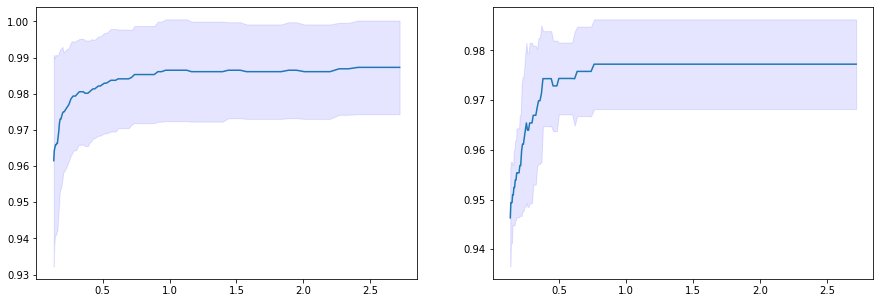

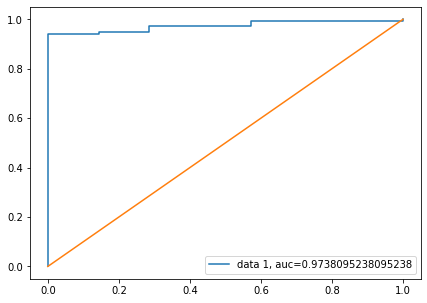

In [2556]:

lassolog(X,y,3)




In [2557]:

np.sum(0 == y)


21

Classification only uniform

[0.94366719 0.94366719 0.94366719 0.94366719 0.94366719]
[0.03683536 0.03683536 0.03683536 0.03683536 0.03683536]
2.3361046166426087
[-0.88093935  1.2504887   0.0740844 ]
Index(['uniformcov_div', 'uniformvar_div', 'uniformtreynor'], dtype='object')


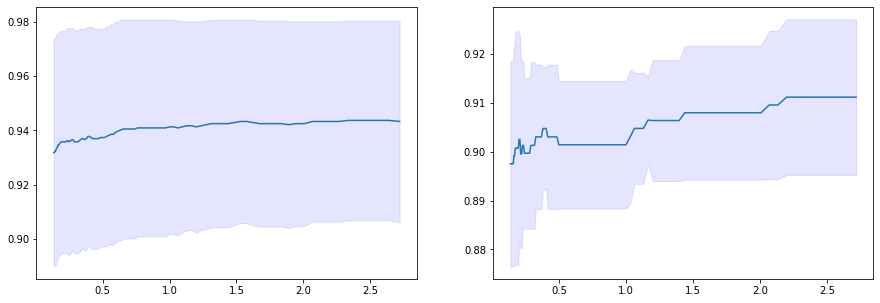

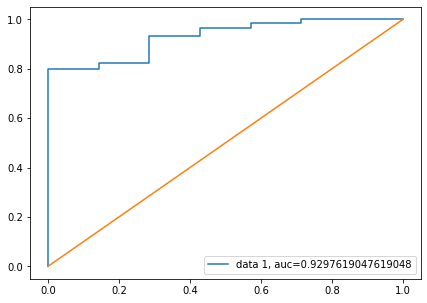

In [2558]:

lassolog(X_uniform,y,3)

GMV

[0.75523088]
[0.11921385]
0.4548085181321939
[0.717402   1.02543792 0.24196564]
Index(['gmvcov_div', 'gmvvar_div', 'gmvtreynor'], dtype='object')


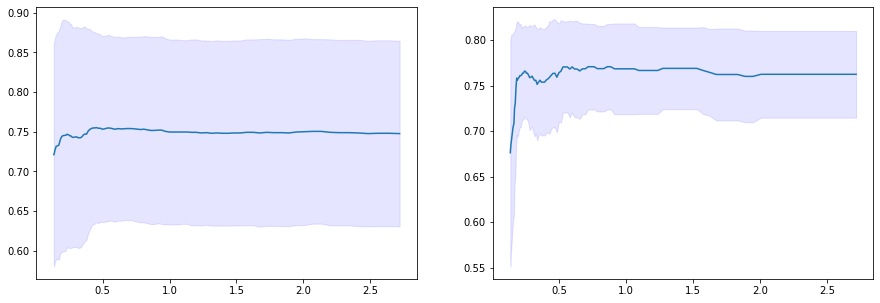

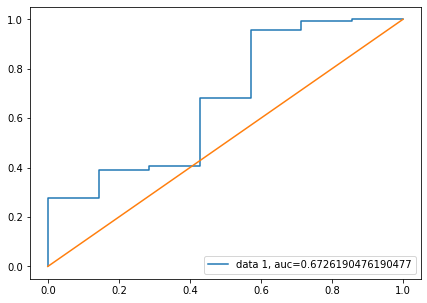

In [2559]:
lassolog(X_gmv,y,3)

Sharpe

[0.9365932 0.9365932]
[0.03721988 0.03721988]
2.637145203350768
[ 0.51018394  1.57595149 -0.985277   -0.83027551]
Index(['sharpecov_div', 'sharpevar_div', 'sharpesortino', 'sharpetreynor'], dtype='object')


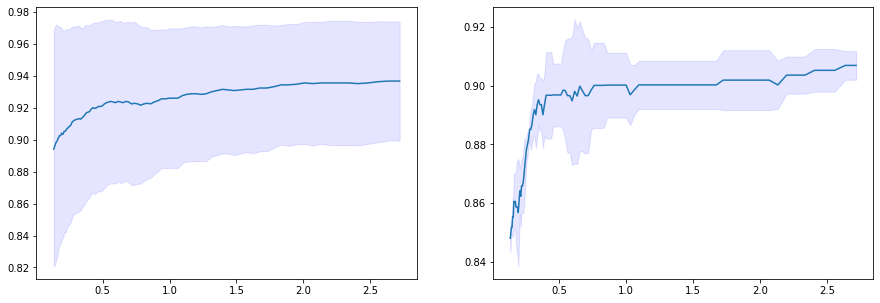

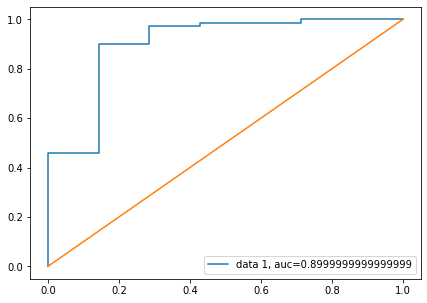

In [2560]:
lassolog(X_sharpe,y,3)

Analyze lasso regression

In [2583]:
lasso_result = pd.read_csv('../data/lasso_result.txt', sep="&")
lasso_result[lasso_result == "x"] = 1
lasso_result[pd.isna(lasso_result)] = 0

In [2592]:
top_feature = lasso_result[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].agg('sum')
top_feature.sort_values(ascending=False)

MDD_pew    53
DR_pew     49
DV_pew     49
MDD_gmv    48
TR_ms      44
DV_gmv     44
DR_gmv     42
DV_ms      42
DR_ms      42
MDD_ms     41
TR_pew     40
TR_gmv     35
O_ms       23
O_pew      20
S_gmv      19
ST_ms      19
S_ms       18
S_pew      18
O_gmv      15
ST_pew     12
ST_gmv     11
dtype: object

In [2599]:
from IPython.display import display

pd.options.display.max_columns = None
top_feature_per_kernel = lasso_result[['Kernel','DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].groupby('Kernel').agg('sum')
display(top_feature_per_kernel)

,DR_pew,DV_pew,S_pew,MDD_pew,O_pew,ST_pew,TR_pew,DR_gmv,DV_gmv,S_gmv,MDD_gmv,O_gmv,ST_gmv,TR_gmv,DR_ms,DV_ms,S_ms,MDD_ms,O_ms,ST_ms,TR_ms
Kernel,,,,,,,,,,,,,,,,,,,,,
Prop,10,11,4,10,5,2,9,8,10,5,9,3,1,7,6,11,5,9,3,3,8
RW,9,8,3,10,4,1,6,8,8,3,11,3,1,6,7,7,4,8,4,2,8
RWattr,10,10,4,11,4,4,7,7,10,2,10,3,3,8,9,9,2,5,6,3,9
SP,10,10,3,11,3,4,10,9,7,8,9,2,3,7,11,9,5,9,6,6,9
WL,10,10,4,11,4,1,8,10,9,1,9,4,3,7,9,6,2,10,4,5,10


In [2696]:
hamming = pd.read_csv('../data/lasso_result.txt', sep="&")
hamming[hamming == "x"] = "1"
hamming[pd.isna(hamming)] = "0"
hamming = hamming.loc[hamming['Kernel'] == 'RW']
hamming['string'] =  hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].sum(1)
hamming

,Sector,Kernel,DR_pew,DV_pew,S_pew,MDD_pew,O_pew,ST_pew,TR_pew,DR_gmv,DV_gmv,S_gmv,MDD_gmv,O_gmv,ST_gmv,TR_gmv,DR_ms,DV_ms,S_ms,MDD_ms,O_ms,ST_ms,TR_ms,string
0,Global,RW,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1.111000e+20
5,Utilities,RW,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1.000000e+20
10,Materials,RW,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1.101001e+20
15,Industrial,RW,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1.111101e+20
20,Energy,RW,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1.011010e+19
25,Communication,RW,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,1,1,1.101101e+20
30,Cyclical,RW,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,1.101010e+20
35,Defensive,RW,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1.011001e+20
40,Estate,RW,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1.101001e+20
45,Technology,RW,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1.001001e+19


<AxesSubplot:>

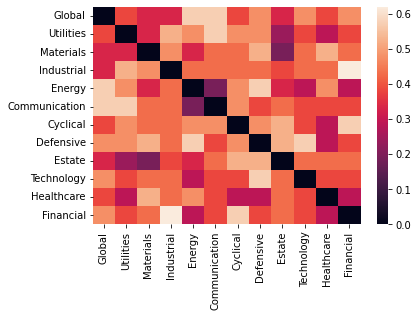

In [2720]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']], metric = 'hamming')
from scipy.cluster.hierarchy import dendrogram, linkage
sns.heatmap(D, xticklabels=hamming['Sector'], yticklabels=hamming['Sector'])


In [2722]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


model = AgglomerativeClustering(affinity='precomputed', n_clusters=3, linkage='complete').fit(D)
print(model.labels_)
print(hamming['Sector'])

[1 0 2 1 2 2 1 0 2 1 0 0]
0            Global
5         Utilities
10        Materials
15       Industrial
20           Energy
25    Communication
30         Cyclical
35        Defensive
40           Estate
45       Technology
50       Healthcare
55        Financial
Name: Sector, dtype: object


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [65.0, 65.0, 84.375, 84.375],
  [55.0, 55.0, 74.6875, 74.6875],
  [40.0, 40.0, 64.84375, 64.84375],
  [25.0, 25.0, 52.421875, 52.421875],
  [15.0, 15.0, 38.7109375, 38.7109375],
  [5.0, 5.0, 26.85546875, 26.85546875]],
 'dcoord': [[0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.0, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047],
  [0.0, 0.2857142857142857, 0.2857142857142857, 0.23809523809523808],
  [0.0, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857],
  [0.0, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857],
  [0.0, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857],
  [0.19047619047619047,
   0.2857142857142857,
   0.2857142857142857,
   0.2857142857142857],
  [0.0, 0.2857142857142857, 0.2857142857142857, 0.2857

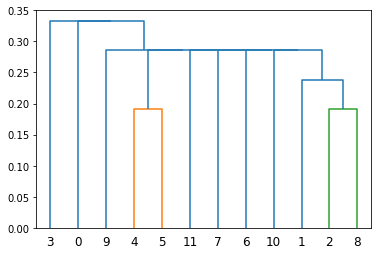

In [2725]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(squareform(D),  )

dendrogram(Z) 

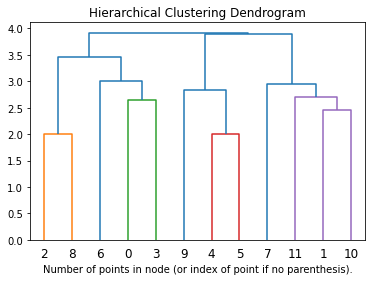

In [2743]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity="euclidean")

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [60.0, 60.0, 100.0, 100.0],
  [20.0, 20.0, 80.0, 80.0]],
 'dcoord': [[0.0, 0.2857142857142857, 0.2857142857142857, 0.0],
  [0.0, 0.38095238095238093, 0.38095238095238093, 0.0],
  [0.2857142857142857,
   0.47619047619047616,
   0.47619047619047616,
   0.38095238095238093],
  [0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.19047619047619047,
   0.42857142857142855,
   0.42857142857142855,
   0.19047619047619047],
  [0.0, 0.3333333333333333, 0.3333333333333333, 0.0],
  [0.0, 0.38095238095238093, 0.38095238095238093, 0.0],
  [0.3333333333333333,
   0.47619047619047616,
   0.47619047619047616,
   0.38095238095238093],
  [0.42857142857142855,
   0.571428571428571

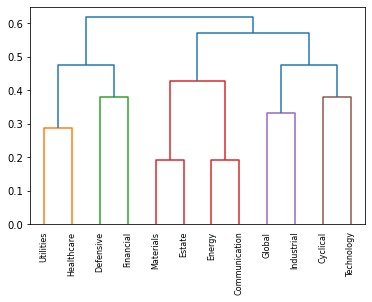

In [2755]:

linked = linkage(X, method = 'complete', metric = 'hamming')
dendrogram(linked, labels = np.array(hamming['Sector']), leaf_rotation=90, leaf_font_size=8)

In [2748]:
linked

array([[ 2.        ,  8.        ,  2.        ,  2.        ],
       [ 4.        ,  5.        ,  2.        ,  2.        ],
       [ 1.        , 12.        ,  2.23606798,  3.        ],
       [10.        , 14.        ,  2.44948974,  4.        ],
       [ 6.        , 15.        ,  2.44948974,  5.        ],
       [ 7.        , 16.        ,  2.44948974,  6.        ],
       [11.        , 17.        ,  2.44948974,  7.        ],
       [13.        , 18.        ,  2.44948974,  9.        ],
       [ 9.        , 19.        ,  2.44948974, 10.        ],
       [ 0.        , 20.        ,  2.64575131, 11.        ],
       [ 3.        , 21.        ,  2.64575131, 12.        ]])

 # SVM





In [2561]:
from matplotlib.pyplot import axvline
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def svm(X, y, cv, gamma ):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    index = np.random.RandomState(seed=42).permutation(X_scaled.shape[0])
    X_scaled = X_scaled[index]
    y_perm = y[index]

    Cs = np.exp(np.linspace(-3, 2, 100))
    auc = []
    auc_std = []
    f1 = []
    f1_std = []
    scoring = {"roc_auc":"roc_auc","f1":"f1"}
    for c in Cs:
        clf_svm = SVC(C=c, kernel='rbf', gamma = gamma, class_weight = 'balanced')
        scores = cross_validate(clf_svm, X_scaled, y_perm, cv=cv, scoring=scoring)
        auc.append(np.mean(scores['test_roc_auc']))
        auc_std.append(np.std(scores['test_roc_auc']))
        f1.append(np.mean(scores['test_f1']))
        f1_std.append(np.std(scores['test_f1']))

    auc_std = np.array(auc_std)
    auc = np.array(auc)
    f1 = np.array(f1)
    f1_std = np.array(f1_std)

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(Cs, auc)
    ax[0].fill_between(Cs, (auc - auc_std), (auc + auc_std), color='blue', alpha=0.1)
    ax[1].plot(Cs, f1)
    ax[1].fill_between(Cs, (f1 - f1_std), (f1 + f1_std), color='blue', alpha=0.1)

    print(auc[auc == np.max(auc)])
    print(auc_std[auc == np.max(auc)])


    # 1std rule
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    i = np.where(auc == np.max(auc))[0][0]
    auc_1std = auc[i]-auc_std[i]






    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_perm,test_size=0.33, random_state=44)
    clf_train = SVC(kernel='rbf', C=Cs[find_nearest(auc, auc_1std)], class_weight = 'balanced',probability=True).fit(X_train, y_train)
    y_pred_proba = clf_train.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_test = metrics.roc_auc_score(y_test, y_pred_proba)

    fig, ax = plt.subplots(1,1, figsize = (7,5))
    ax.plot(fpr,tpr,label="data 1, auc="+str(auc_test))
    ax.plot([0,1],[0,1])
    ax.legend(loc=4)

all

[0.99920635 0.99920635 0.99920635 0.99920635]
[0.00112239 0.00112239 0.00112239 0.00112239]


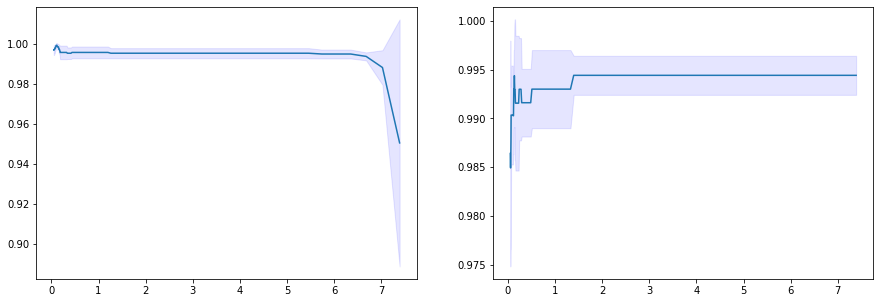

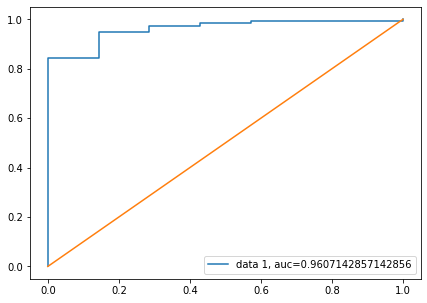

In [2562]:
svm(X,y,3,1)

uniform

[0.9952381]
[0.00673435]


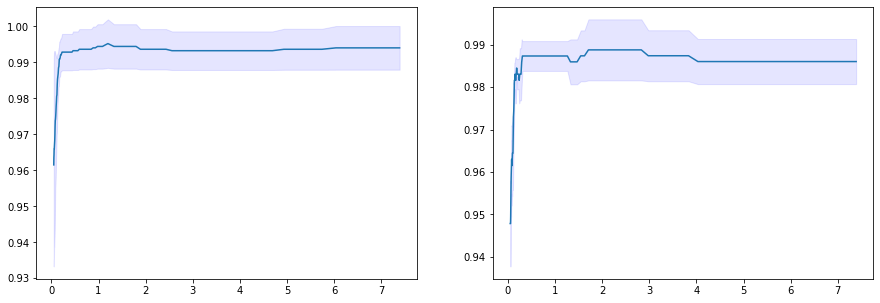

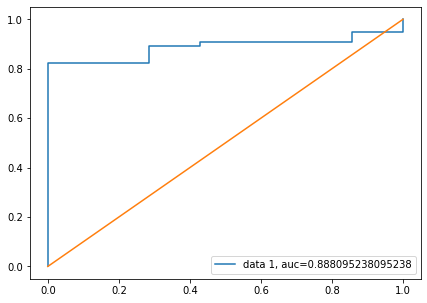

In [2563]:
svm(X_uniform,y,3,1)

gmv

[0.99247344 0.99247344]
[0.00755497 0.00755497]


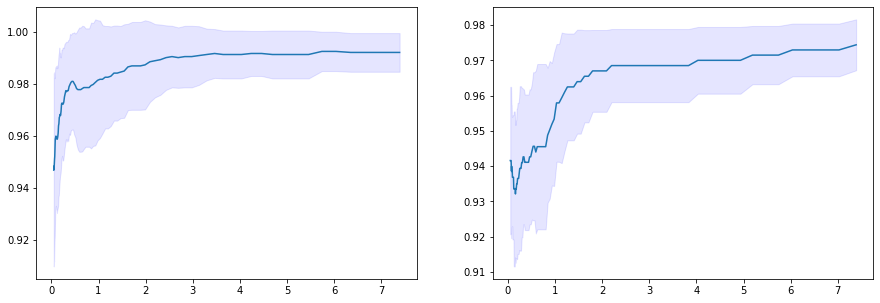

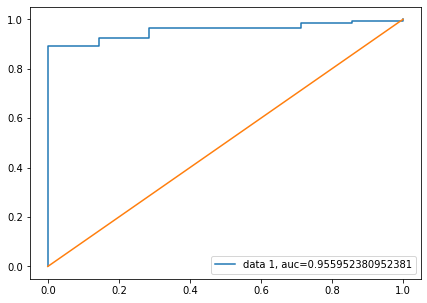

In [2564]:
svm(X_gmv,y,3,1)

 Sharpe

[0.99405746 0.99405746 0.99405746]
[0.00258085 0.00258085 0.0019561 ]


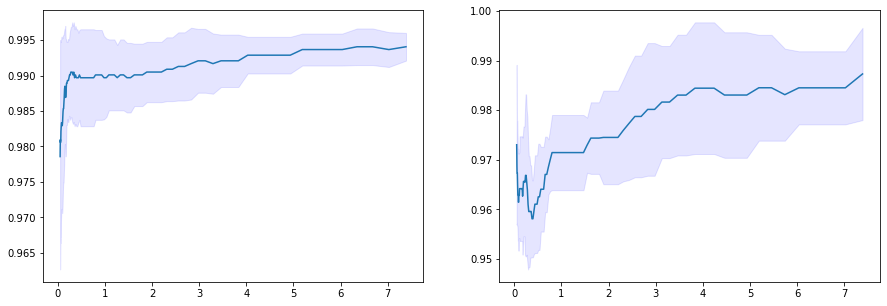

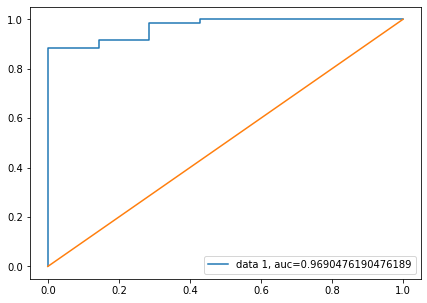

In [2565]:
svm(X_sharpe,y,3,1)